SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 01 - Introdução ao processamento digital de imagens

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

# *A Transformada de Radon*

* Exemplo baseado em [1]

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#A-Transformada-adiante" data-toc-modified-id="A-Transformada-adiante-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A Transformada adiante</a></span></li><li><span><a href="#A-reconstrução-usando-Filtered-Back-Projection-(FBP)" data-toc-modified-id="A-reconstrução-usando-Filtered-Back-Projection-(FBP)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A reconstrução usando Filtered Back Projection (FBP)</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data, transform 

%matplotlib notebook

In [2]:
skimage.__version__

'0.17.2'

## A Transformada adiante

(400, 400)
(160, 160)
160


C:\Users\joaof\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


(160, 160)


<IPython.core.display.Javascript object>


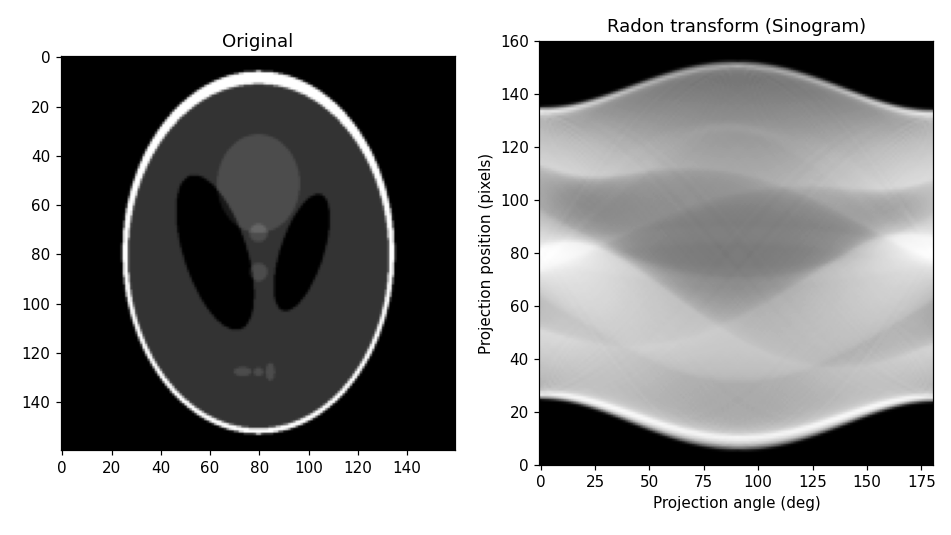

In [3]:
# Phantom de Shepp-Logan
# (Descomente para utilizar.)
# ----------------------
image = data.shepp_logan_phantom()
print(image.shape)
# Reduz o tamanho da imagem para 40% do seu tamanho original
image = transform.rescale(image, scale=0.4, mode='reflect')
print(image.shape)

# Imagem artificial
# (Descomente para utilizar.)
# -----------------
# image = plt.imread('./images/corpo_02_ok.png')
# print(image.shape)

# Numero de angulos amostrados
# (O número de aquisições pode ser estimado a partir do número de pixels da imagem)
num_angles = max(image.shape) // 1 # O divisor que determina a redução da resolução da aquisição
### num_angles = 8 
print(num_angles)

# Define os angulos em que a amostra será imageada
theta = np.linspace(0., 180., int(num_angles), endpoint=False)

# Constrói o sinograma usando a transformada de Radon
sinogram = transform.radon(image, theta=theta)
print(sinogram.shape)

dx, dy = 0.5 * 180.0 / num_angles, 0.5 / sinogram.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap='gray')

ax2.set_title("Radon transform (Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


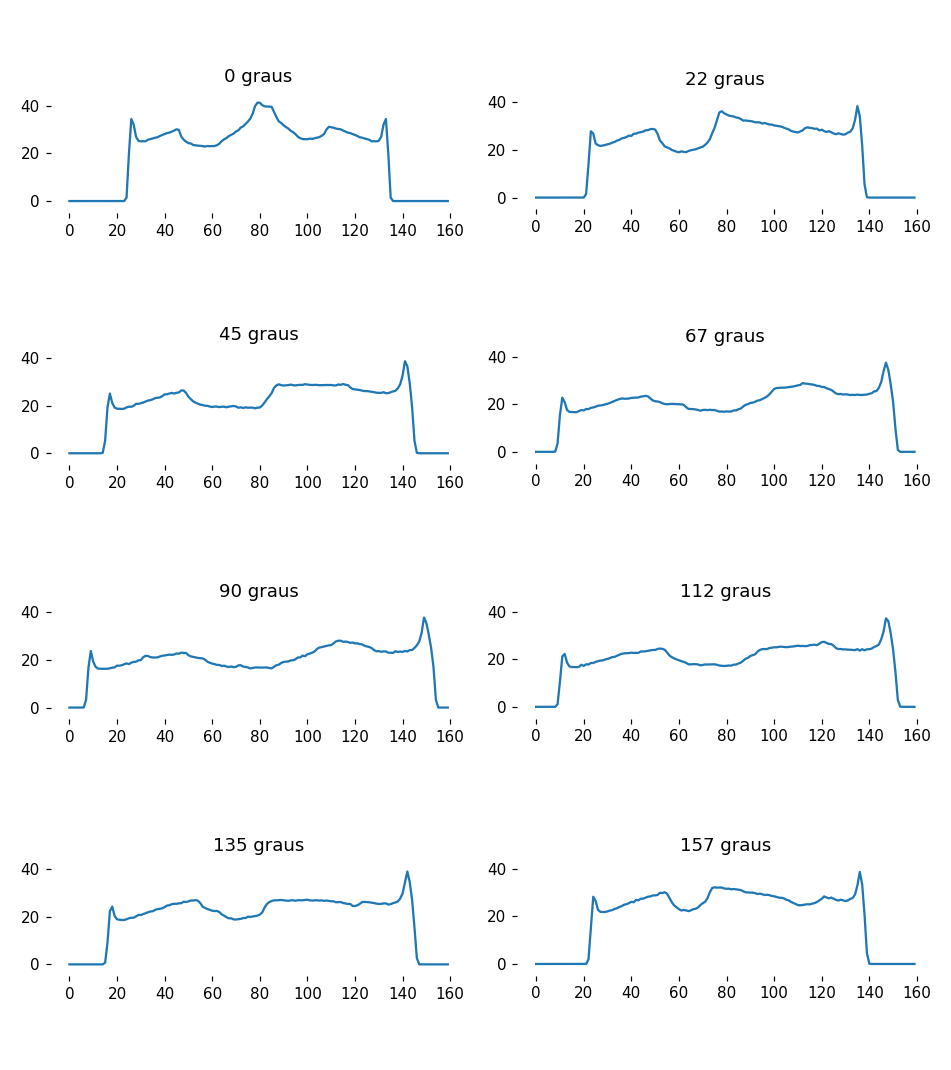

In [4]:
fig, ax = plt.subplots(4, 2, figsize=(8, 9))

### plt.style.use('dark_background')

for i, j in enumerate(np.linspace(0, num_angles, 8, endpoint=False).astype(int)):
    # print(i)
    ax[i//2, i%2].set_title(f'{int(j/num_angles*180)} graus')
    ax[i//2, i%2].plot(sinogram[:,j])
    #ax[i//2, i%2].axis('equal')
    ax[i//2, i%2].set_aspect('equal')
    ax[i//2, i%2].set_ylim(-5, sinogram[:,j].max() + 5)
    ax[i//2, i%2].set_frame_on(False)
    
fig.tight_layout()
plt.show()

## A reconstrução usando Filtered Back Projection (FBP)

FBP rms reconstruction error: 0.0283


<IPython.core.display.Javascript object>


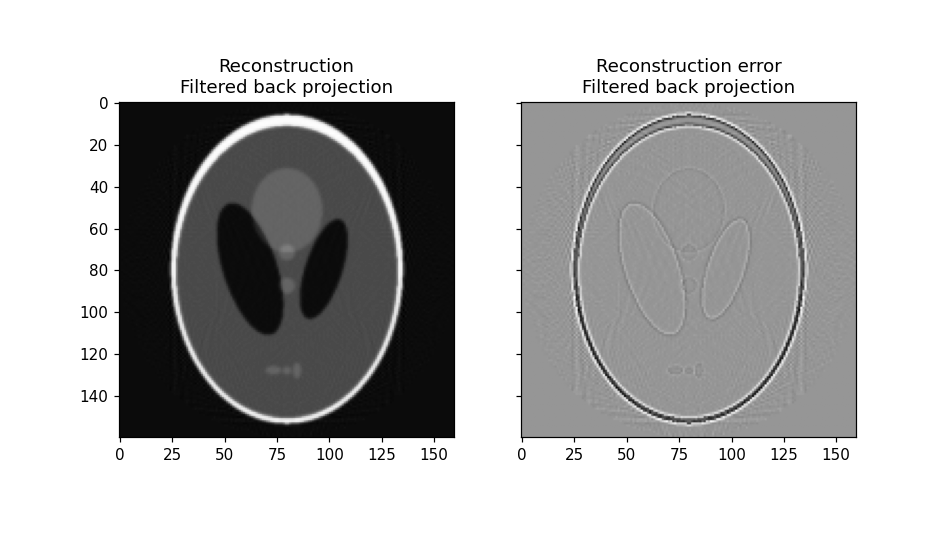

In [5]:
# Transformada inversa de Radon
# (reconstrói a imagem original a partir das projeções)
reconstruction_fbp = transform.iradon(sinogram, theta=theta, filter_name='ramp')

# Calcula o erro entre a reconstrução e a imagem original.
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

# imkwargs = dict(vmin=-0.2, vmax=0.2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, vmin=-0.2, vmax=0.2)
plt.show()

# Referencias
---

1. Radom Transform
    * https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html